In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stock_data.csv to stock_data.csv


In [ ]:
import pandas as pd
data = pd.read_csv('/content/stock_data.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the stock data from a CSV file
file_path = '/content/stock_data.csv'
stock_data = pd.read_csv(file_path)

# Convert the date column to datetime format and set it as the index
stock_data['Date'] = pd.to_datetime(stock_data['Unnamed: 0'])
stock_data.set_index('Date', inplace=True)
stock_data.drop(columns=['Unnamed: 0'], inplace=True)

# Select the stock for which we want to make predictions (e.g., Stock_1)
stock = stock_data['Stock_1'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_stock = scaler.fit_transform(stock)

# Define a function to create sequences for LSTM
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

# Set sequence length
seq_length = 60

# Create sequences
x, y = create_sequences(scaled_stock, seq_length)

# Split the data into training and test sets
train_size = int(len(x) * 0.8)
x_train, y_train = x[:train_size], y[:train_size]
x_test, y_test = x[train_size:], y[train_size:]

# Display the shapes of the training and testing sets
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (244, 60, 1)
Training labels shape: (244, 1)
Testing data shape: (61, 60, 1)
Testing labels shape: (61, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_test, y_test), verbose=1)

# Display the model summary
model.summary()


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.2250 - val_loss: 0.0728
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0517 - val_loss: 0.0086
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0233 - val_loss: 0.0200
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0152 - val_loss: 0.0237
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0153 - val_loss: 0.0123
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0120 - val_loss: 0.0153
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0121 - val_loss: 0.0111
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0123 - val_loss: 0.0108
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0101 - val_loss: 0.0075
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0097 - val_loss: 0.0087
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0085 - val_loss: 0.0066
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0093 - val_loss: 0.0063
Epoch 13/20

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 770ms/step


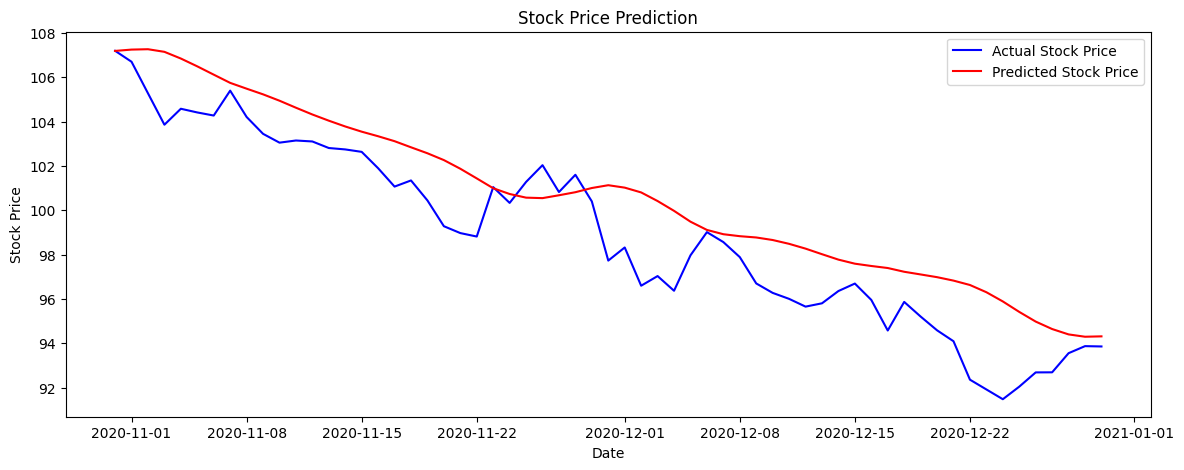

In [ ]:
# Predict the stock prices using the test data
predictions = model.predict(x_test)

# Inverse transform the predictions and the true values to get them back to the original scale
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test)

# Plotting the results to visualize how well the model predicted the stock prices
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.plot(stock_data.index[-len(y_test):], y_test_scaled, color='blue', label='Actual Stock Price')
plt.plot(stock_data.index[-len(y_test):], predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()